In [215]:
import numpy as np
# Initialize Otter
import otter
from matplotlib import pyplot as plt


grader = otter.Notebook("04-exercise-pids2024.ipynb")

# Exercise sheet 4
**Hello everyone!**

# Points: 15

Topics of this exercise sheet are:
* Working with seaborn
* Data visualization principles

Please let us know if you have questions or problems! <br>
Contact us during the exercise session or on [Piazza](https://piazza.com/unibas.ch/spring2024/63982).

**Automatic Feedback**

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 

In [216]:
import pandas as pd
import seaborn as sns

## Question 1 (7 points)

We will use data from [Kaggle](https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021) about different cities around the world.

In [217]:
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")
cities

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


### 1a) (2 points)

**Replace** the values in the columns:
       
- "Cost of a bottle of water(City)"
- "Sunshine hours(City)"
- "Cost of a monthly gym membership(City)"
- "Obesity levels(Country)"
       
with numerical values (float). Make sure to also convert percentage values. For example, a value "20.40%" should be converted to "0.204".
  
  In case values are missing (as indicated by the `-`) replace them with `np.nan`, which is used in Pandas to mark missing values. 

  **Hint:** Extract the column, apply the pandas functions `.str` and `.astype()` and `.replace()` and write the changed column back into the dataframe. Use the help function to find examples of how to use the above functions.

  **Take note:** Once you have replaced the columns, re-running this cell will give you an error since methods like .str do not apply to the replaced float values.

In [218]:
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")


class Helpers:
    @staticmethod
    def convert_to_unitless(series: pd.Series, unit: str):
        return series.replace(f"[\${unit},)]", '', regex=True).astype(float)
    
    @staticmethod
    def replace_na_value(series: pd.Series, na_value: str):
        return series.replace(na_value, np.nan).astype(float)


class Question1a:
    cost_of_water_column = Helpers.convert_to_unitless(cities['Cost of a bottle of water(City)'], '£')
    sunshine_hours_column = Helpers.replace_na_value(cities['Sunshine hours(City)'], '-')
    cost_of_gym_column = Helpers.convert_to_unitless(cities['Cost of a monthly gym membership(City)'], '£')
    obesity_level_column = Helpers.convert_to_unitless(cities['Obesity levels(Country)'], '%') / 100
    
    cities['Cost of a bottle of water(City)'] = cost_of_water_column
    cities['Sunshine hours(City)'] = sunshine_hours_column
    cities['Cost of a monthly gym membership(City)'] = cost_of_gym_column
    cities['Obesity levels(Country)'] = obesity_level_column


In [219]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point)
What is the mean of the column "Obesity levels(Country)"?

Assign this number to the variable *mean_obesity_level*.

In [220]:
class Question1b:
    mean_obesity_level = cities['Obesity levels(Country)'].mean()


In [221]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (1 point)
Is the mean a good measure to summarize the values of "Obesity levels(Country)"?

* Create a histogram ( with 13 bins) for the column "Obesity levels(Country)" using the seaborn plot function.

* Which of the following distributions describes best the distribution you see on the histogramm of Obesity levels?
        - Gaussian
        - Bimodal
        - Binomial
        - Poisson
  
    * Assign the correct distribution (its name as a string) to the variable "distribution". Beware: Python is case sensitive.
    
    
* Is the mean a good measure to summarize the values of "Obesity levels(Country)"? Yes or No?
    * Assign "yes" or "no" (as strings) to the variable called "answer".

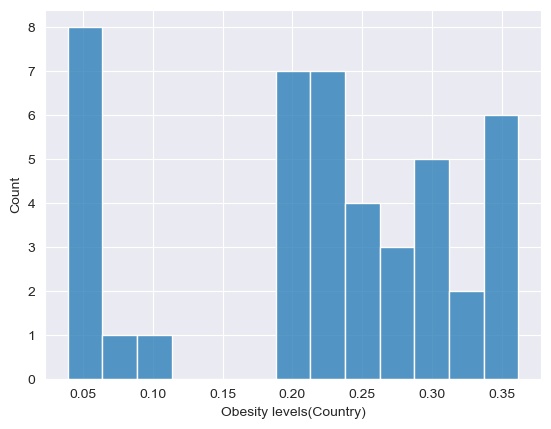

In [222]:
class Question1c:
    obesity_levels_hist = sns.histplot(cities['Obesity levels(Country)'], bins=13)
    distribution = 'Bimodal'
    answer = 'no'

In [223]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

### 1d) (2 points)
Please make a new column (for the existing data frame) called "Continent" containing the continent of each city (type: string). <br>
If a city is in multiple continents, choose one (it will make the following plots cleaner). <br>
Use this list of continent names: Africa, America, Antarctica, Australia, Asia, Europe, Oceania.

Save it back to the variable cities 

**Hint:** There is no fancy function you need, just patience. One possible solution is to create a `dict` with the names as the key and the continent as the value and then use pandas `apply` function to map the cities to the continent. Or, you just unglamerously add the continent value one by one into a list that you make into a column. 

In [224]:
class Question1d:
    cities_with_continents = cities.copy()
    cities_with_continents.insert(1, column='Continent', value='')
    
    cities_with_continent_values = {
        'Africa': ['Johannesburg', ],
        'America': ['Buenos Aires', 'Toronto', 'Los Angeles', 'Boston', 'Chicago', 'San Francisco', 'Sao Paulo',
            "Washington, D.C.", 'New York', 'Mexico City', ],
        'Antarctica': [],
        'Australia': ['Sydney', 'Melbourne'],
        'Asia': ['Fukuoka', 'Beijing', 'Bangkok', 'Seoul', 'Tel Aviv', 'Cairo', 'Taipei', 'Mumbai', 'Tokyo',
            'Hong Kong',
            'Shanghai', ],
        'Europe': ['Amsterdam', 'Vienna', 'Stockholm', 'Copenhagen', 'Helsinki', 'Berlin', 'Barcelona', 'Vancouver',
            'Madrid', 'Frankfurt', 'Geneva', 'Istanbul', 'Dublin', 'Brussels', 'Paris', 'Zurich', 'London', 'Milan',
            'Moscow', ],
        'Oceania': ['Jakarta', ],
    }
    
    for continent, cities_of_continent in cities_with_continent_values.items():
        cities_with_continents.loc[cities_with_continents['City'].isin(cities_of_continent), 'Continent'] = continent


Question1d().cities_with_continents


,City,Continent,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,Europe,1,1858.0,1.92,0.204,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,Australia,2,2636.0,1.48,0.290,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,Europe,3,1884.0,1.94,0.201,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,Europe,4,1821.0,1.72,0.206,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,Europe,5,1630.0,2.19,0.197,79.8,21.24,1380,7.64,154,523,32.53
5,Helsinki,Europe,6,1662.0,1.60,0.222,80.4,13.08,1540,7.80,113,309,35.23
6,Fukuoka,Asia,7,2769.0,0.78,0.043,83.2,-,1644,5.87,35,539,55.87
7,Berlin,Europe,8,1626.0,1.55,0.223,80.6,39.41,1386,7.07,254,1729,26.11
8,Barcelona,Europe,9,2591.0,1.19,0.238,82.2,65.19,1686,6.40,585,2344,37.80
9,Vancouver,Europe,10,1938.0,1.08,0.294,81.7,24.26,1670,7.23,218,788,31.04


In [225]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

### 1e) (1 point)
What does the column "Continent" have to do with question 1c? (Hint: This is pretty similar to the penguin flipper lengths from the lecture)

* Using the seaborn histogram function (bins=10) display the column "Obesity levels(Country)" in a way such that countries on the same continent show up in the same color.
* Bars from different continents, that belong to the same bin, should be stacked on top of eachother.
* How many bins for the continent of asia do you see?
    * Assign this number to the variable called *asia_bins*

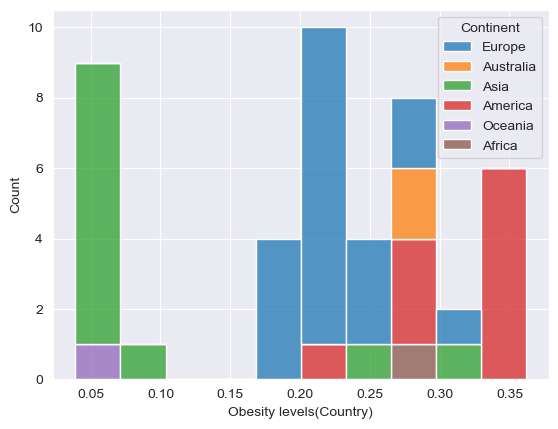

In [226]:
class Question1e:
    color_code_plot = sns.histplot(
        data=Question1d().cities_with_continents,
        x='Obesity levels(Country)',
        hue='Continent',
        multiple='stack',
        bins=10
    )
    asia_bins = 4
    
    #We can now see that countries in Asia have very different obesity levels than countries in other continents.
    #This means that we should take e.g. a mean per continent.

In [227]:
grader.check("Question 1e")

Question 1e results: All test cases passed!

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Melbourne_skyline_from_Williamstown.png)

## Question 2 (6 points)
You have gotten the job as data visualization expert in Melbourne. 🎉 Congratulations! <br>
Your first task is to make a stunning plot to convince everyone that Melbourne is the best city in the whole wide world! We want to print it on posters! Or at least in the national tourism brochure.

* Make **one plot** using any and all (evil) principles of data visualization. If you need inspiration, look at the examples on the lecture slides or here: https://www.youtube.com/watch?v=E91bGT9BjYk or google "misleading data visualization".



Upload your plot to our [padlet](https://padlet.com/marcelluthi/melbourne-advertisement-20avx3t39rtz6b8n) (copy-paste or drag-and-drop). Write an appealing title and make sure your full name is either in the title or captions (the 6 points for this task are handed out based on this upload)



<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 6     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

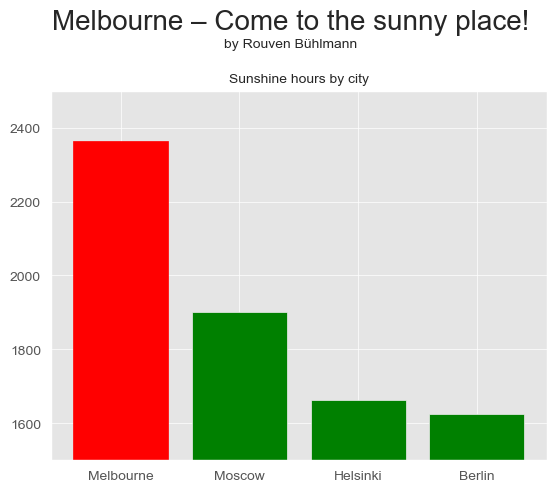

In [297]:
## solution ##
sunshine_x = ['Melbourne', 'Moscow', 'Helsinki', 'Berlin']
sunshine_y = list(map(lambda city: cities.loc[cities['City'] == city]['Sunshine hours(City)'].iloc[0], sunshine_x))

sunshine_y

fig, ax = plt.subplots()
barplot = ax.bar(x=sunshine_x, height=sunshine_y, label='Sunshine', color='green');
ax.set_ylim(1500, 2500);
ax.set_title('Sunshine hours by city', fontsize=10)
fig.suptitle('Melbourne – Come to the sunny place!', fontsize=20, y=1.05)
fig.text(0.5, 0.97, "by Rouven Bühlmann", horizontalalignment="center")

barplot[0].set_color('red')

<!-- END QUESTION -->



## Question 3 (2 points)

Where did this data even come from? Find one instance where a data point in the cities dataframe looks false. Write one sentence explaining why it is false and provide a source proving your claim.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 3      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [303]:
## solution ##
answer = '''
I've cross checked the data point "Sunshine hours(City)" for Zurich by using Meteo Suisse data for the measuring station "Zurich, Fluntern"; the value found in the Kaggle dataset does not match any yearly value in the Meteo Suisse dataset, being lower than any of the values from 2014 onwards.
Quelle: https://www.meteoschweiz.admin.ch/service-und-publikationen/applikationen/ext/climate-overview-series-public.html
'''

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [304]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 1e results: All test cases passed!